# Preprocess HAM10000 Images
This notebook loads metadata, resizes images to 224x224, and saves them to the processed directory in /data.

In [2]:
import os
import pandas as pd
import cv2
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

## Define Paths

In [3]:
DATA_PATH = '../data/raw/'
PROCESSED_PATH = '../data/processed/images/'
os.makedirs(PROCESSED_PATH, exist_ok=True)

## Load Metadata

In [4]:
def load_metadata():
# Load metadata CSV file.
    csv_path = os.path.join(DATA_PATH, 'HAM10000_metadata.csv')
    return pd.read_csv(csv_path)

df = load_metadata()
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


## Preprocess Images

In [7]:
def preprocess_images():
# Resize images and store them in processed folder.
    image_paths = glob(os.path.join(DATA_PATH + "/images", "*.jpg"))
    
    for img_path in tqdm(image_paths, desc='Processing Images'):
        img = cv2.imread(img_path)
        if img is None:
            print(f'Warning: Could not read {img_path}')
            continue
        img_resized = cv2.resize(img, (224, 224))  # Resize for EfficientNet
        save_path = os.path.join(PROCESSED_PATH, os.path.basename(img_path))
        cv2.imwrite(save_path, img_resized)
    
    print(f'Processed {len(image_paths)} images and saved to {PROCESSED_PATH}')

preprocess_images()

Processing Images: 100%|██████████| 10015/10015 [01:03<00:00, 158.87it/s]

Processed 10015 images and saved to ../data/processed/


## Visualize Processed Images

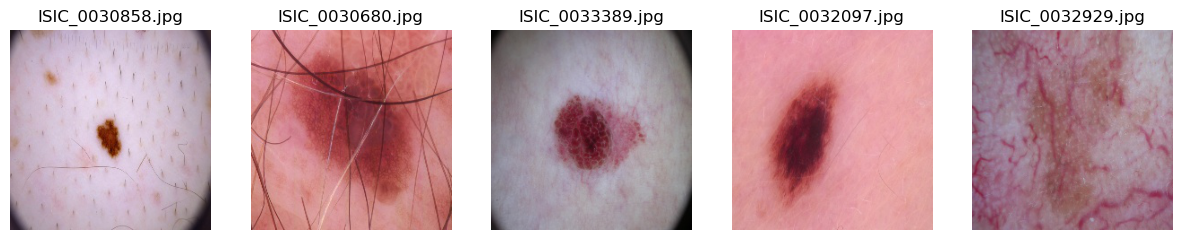

In [5]:
processed_images = glob(os.path.join(PROCESSED_PATH, '*.jpg'))[:5]
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, img_path in zip(axes, processed_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path))
    ax.axis('off')
plt.show()